<font color='blue'><p>
## Exercise #1 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform

import gc  # garbage collection
from sklearn.cluster import KMeans  # k-means 군집분석
from sklearn.metrics import silhouette_score  # 군집분석 평가를 위한 silhouette 값 계산

%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

Populating the interactive namespace from numpy and matplotlib


C:\Users\SEC\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sum', 'rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [18]:
cs = pd.read_csv('L사_고객정보.csv')
gd = pd.read_csv('L사_상품정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

gd.pd_c = gd.pd_c.astype(str).str.zfill(4) 
df = pd.merge(tr, cs).merge(gd, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64')

**[문제 1, 9점]** Gaussian RBF는 $\large y=e^{-{\gamma}x^2}$로 정의된다. np.linspace() 함수를 사용하여 –25에서 +25 사이의 간격이 균일한 1000개의 값을 x로 정하고, $\gamma$(gamma)값을 0.01, 0.02, 0.05으로 변화시켜가면서 3가지 형태의 Gaussian RBF를 도식하시오. 단, gamma 값을 범례로 표시할 것.

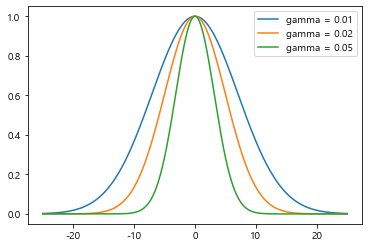

In [2]:
x = np.linspace(-25,25,1000)
y1 = np.exp(-0.01 * x ** 2)
y2 = np.exp(-0.02 * x ** 2)
y3 = np.exp(-0.05 * x ** 2)

plt.plot(x,y1,label='gamma = 0.01')
plt.plot(x,y2,label ='gamma = 0.02')
plt.plot(x,y3,label='gamma = 0.05')
plt.legend()
plt.show()

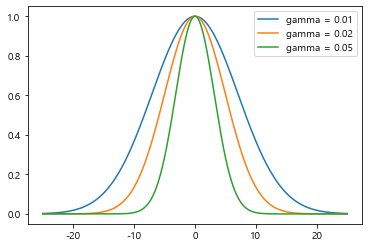

In [3]:
def rbf(x,gamma):
    return np.exp(-gamma * np.abs(x) ** 2)

x = np.linspace(-25,25,1000)
plt.plot(x,rbf(x, 0.01),label='gamma = 0.01')
plt.plot(x,rbf(x, 0.02),label ='gamma = 0.02')
plt.plot(x,rbf(x, 0.05),label='gamma = 0.05')
plt.legend()
plt.show()

**[문제 2, 8점]** `L사_거래정보.csv` 데이터를 이용하여, `biz_unit`의 판매수량(buy_ct의 합)을 계산한 후 아래와 같은 Bar Chart를 도식하시오. 

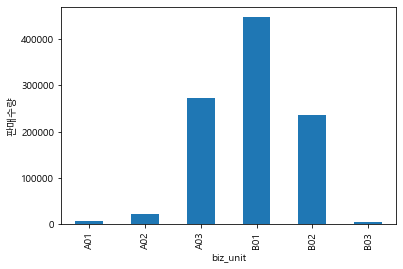

In [3]:
tr = pd.read_csv('L사_거래정보.csv')
tr.head(3)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1


In [13]:
L = tr.groupby("biz_unit").buy_ct.sum().reset_index()
L

,biz_unit,buy_ct
0,A01,6277
1,A02,21680
2,A03,273138
3,B01,447736
4,B02,236093
5,B03,4450


In [10]:
L = tr.groupby("biz_unit").buy_ct.sum().reset_index()
L.set_index('biz_unit', inplace=True)
L

,buy_ct
biz_unit,
A01,6277
A02,21680
A03,273138
B01,447736
B02,236093
B03,4450


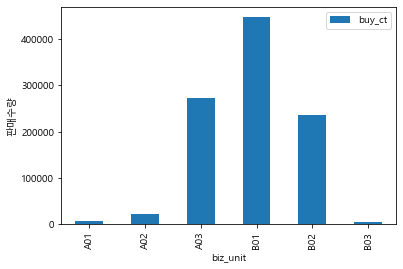

In [14]:
L = tr.groupby("biz_unit").buy_ct.sum().reset_index()
L.set_index('biz_unit', inplace=True)
L
L.plot.bar()
plt.xlabel("biz_unit")
plt.ylabel("판매수량")
plt.show()

In [19]:
df = pd.read_table('dataTransactions.tab', sep='\t', encoding='cp949')
df = df.groupby('brand').size().sort_values(ascending=False)[1:11]
df.plot(kind='pie',figsize=(8,8),autopct='%2.2f%%')
plt.ylabel('brand')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'dataTransactions.tab'

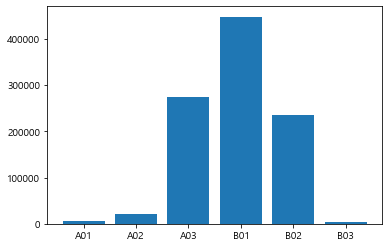

In [12]:
import pandas as pd
csv_reader = pd.read_csv("L사_거래정보.csv")
sum=0
chart_list = [0,0,0,0,0,0]
trade_info = pd.DataFrame(csv_reader)
for i in range(0,len(trade_info)):
    if trade_info['biz_unit'][i] == "A01":
        chart_list[0]+=trade_info['buy_ct'][i]
    if trade_info['biz_unit'][i] == "A02":
        chart_list[1]+=trade_info['buy_ct'][i]
    if trade_info['biz_unit'][i] == "A03":
        chart_list[2]+=trade_info['buy_ct'][i]
    if trade_info['biz_unit'][i] == "B01":
        chart_list[3]+=trade_info['buy_ct'][i]
    if trade_info['biz_unit'][i] == "B02":
        chart_list[4]+=trade_info['buy_ct'][i]
    if trade_info['biz_unit'][i] == "B03":
        chart_list[5]+=trade_info['buy_ct'][i]

name=["A01","A02","A03","B01","B02","B03"]
plt.bar(name,chart_list)
plt.show()


**[문제 3, 8점]** `L사_거래정보.csv` 데이터를 이용하여, 판매상품(중분류) `Eggs`와 `Milk`의 가격 분포도(seaborn의 distplot)를 아래와 같이 도식하시오. *Hint: x축의 제목은 axes의 set_xlabel()로 지정.*

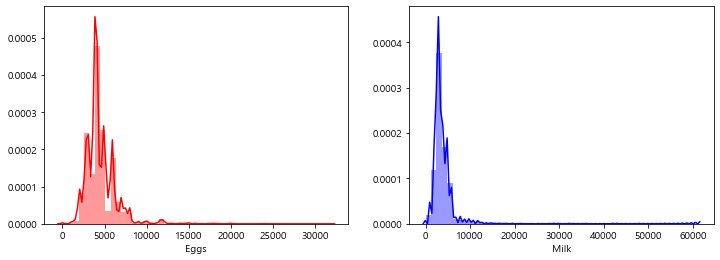

In [11]:
col = df.query('clac_nm2 == "Eggs" or clac_nm2 == "Milk"')
col.head(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
16955,21922,90411,2,A03,0348,2019-09-02,13:29,2490,1,F,50,Dairy Products,Milk,Functional Milk
16956,21922,51249,1,A03,0348,2019-07-16,23:21,2890,1,F,50,Dairy Products,Milk,Functional Milk


In [14]:
em = pd.pivot_table(col, index ="clnt_id" ,columns='clac_nm2', values='buy_am')
em

clac_nm2,Eggs,Milk
clnt_id,,
9,NaN,2493.333333
20,4990.000000,NaN
23,4390.000000,2650.000000
24,3990.000000,2740.000000
29,2423.333333,NaN
...,...,...
72333,4590.000000,12760.000000
72340,3990.000000,2277.500000
72373,NaN,3290.000000


In [9]:
import pandas as pd 
gd= pd.read_csv('L사_상품정보.csv')

for i in gd['clac_nm2']:
    if i =='Eggs':
        print(i)
        
    if i =='Milk':
        print(i)

Milk
Milk
Eggs
Eggs
Eggs
Eggs


In [15]:
import pandas as pd
gd = pd.read_csv('L사_상품정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

eggs_pd_c=[]
milk_pd_c=[]

eggs_price=[]
milk_price=[]

eggs_count=0
milk_count=0

k=1; j=1
for i in gd['clac_nm2']:
    if i =='Eggs':
        eggs_pd_c.append(k)
        
    if i =='Milk':
        milk_pd_c.append(k)
    k+=1
print(milk_pd_c, eggs_pd_c, eggs_count)
for price in tr['buy_am']:    
    if (len(eggs_pd_c) > eggs_count):
        if j == eggs_pd_c[eggs_count]:
            print(j, eggs_count)
            eggs_price.append(price)
            eggs_count+=1
    if (len(milk_pd_c) > milk_count):
        if j == milk_pd_c[milk_count]:
            milk_price.append(price)
            milk_count+=1
    j+=1
    
print(eggs_price)
print(milk_price)

[347, 348] [964, 965, 966, 967] 0
964 0
965 1
966 2
967 3
[6000, 3000, 650, 3870]
[2490, 2790]


In [ ]:
sns.displot(data=iris, x='sepal_length', kind='hist', rug=True, kde=True, col='species')
plt.show()

**[문제 4, 7점]** `L사_고객정보.csv` 데이터를 이용하여 `연령대별`(known 제외) 구성비를 Pie Chart로 도식하시오. 단, figsize는 (6,6)로 하고 startangle은 45도, 그리고 autopct는 소수점 1자리 퍼센트로 설정할 것.

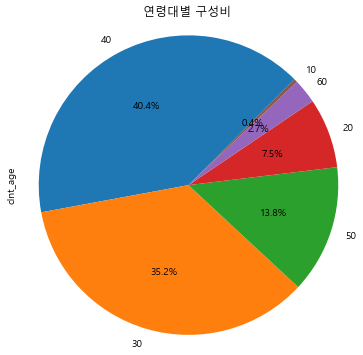

In [12]:
cs = pd.read_csv('L사_고객정보.csv')
cs.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [27]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72399 entries, 0 to 72398
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clnt_id      72399 non-null  int64 
 1   clnt_gender  72399 non-null  object
 2   clnt_age     72399 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
cs = cs.replace("unknown", np.NaN)

In [14]:
cs.dropna()

,clnt_id,clnt_gender,clnt_age
1,2,F,30
8,9,F,40
11,12,F,40
19,20,F,30
21,22,M,30
...,...,...,...
72342,72373,F,50
72369,72400,F,40
72379,72410,F,40
72392,72423,F,30


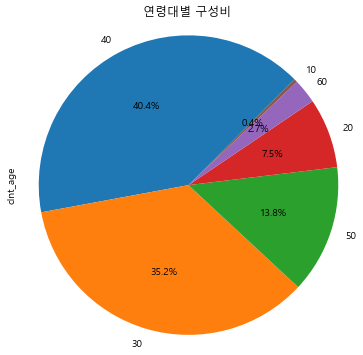

In [30]:
plt.figure(figsize(6,6))
cs.clnt_age.value_counts().plot.pie(autopct="%.1f%%", figsize=(6,6), startangle=45, legend=False)
plt.title("연령대별 구성비")
plt.axis('equal')
plt.show()

**[문제 5, 8점]** `L사_거래정보.csv` 데이터를 이용하여 아래와 같은 Heatmap을 도식하시오. 각 셀은 구매건수(buy_ct의 합이 아님)를 의미함.

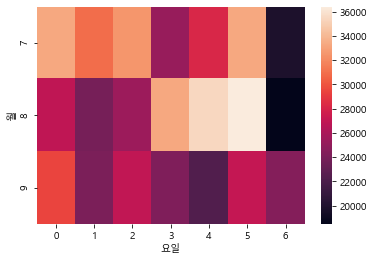

In [65]:
tr = pd.read_csv('L사_거래정보.csv')
tr.head(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1


In [66]:
tr.de_dt = tr.de_dt.astype('str').astype('datetime64')

In [67]:
tr["요일"] = tr.de_dt.dt.weekday

In [68]:
tr['월'] =tr.de_dt.dt.month

In [69]:
tr = tr.query('월 ==7 or 월 ==8 or 월 ==9')
tr

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,요일,월
0,21922,104999,1,A03,unknown,2019-09-20,12:41,5990,1,4,9
1,21279,104907,4,A03,unknown,2019-09-20,10:27,10900,1,4,9
2,39423,105124,11,A03,unknown,2019-09-20,17:26,12900,1,4,9
3,18362,104010,1,A03,unknown,2019-09-20,09:57,9900,1,4,9
4,39423,105124,13,A03,0565,2019-09-20,17:26,2990,1,4,9
...,...,...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,2019-09-27,14:09,3500,1,4,9
599957,35311,2839,4,B03,0339,2019-09-27,14:09,3600,2,4,9
599958,35311,2839,5,B03,0339,2019-09-27,14:09,3500,1,4,9
599959,35311,2839,2,B03,0339,2019-09-27,14:09,4500,1,4,9


In [73]:
hit = pd.pivot_table(tr, index="월", columns='요일', values='buy_ct', aggfunc=np.sum, fill_value=0)
hit

요일,0,1,2,3,4,5,6
월,,,,,,,
7,50449,53489,55300,44168,51246,59226,33826
8,45531,41582,42122,56468,58178,64264,29019
9,47536,43030,47606,41012,36598,47676,41048


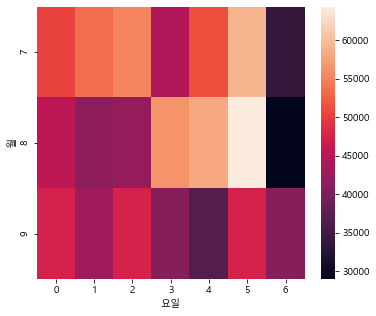

In [77]:
plt.figure(figsize=(6,5))
sns.heatmap(hit)
plt.show()